In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

from model import DNN


C:\Users\qhddn\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Hyperparameters
input_size = 784
hidden_size = [128, 64]
output_size = 10
num_epochs = 20
learning_rate = 0.001
epsilons = [0, 0.1, 0.15, 0.2]
alpha = 0.3
steps = 10

In [3]:
# Download and load the MNIST data
train_data = datasets.FashionMNIST('FashionMNIST', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_data = datasets.FashionMNIST('FashionMNIST', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)


In [4]:
use_cuda = True  
# Define what device we are using
print("CUDA Available:", torch.cuda.is_available())  

device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")


CUDA Available: False


In [5]:
# Initialize the network
model = DNN(input_size, hidden_size, output_size)
model = model.to(device)

# Train the model
train_acc = model.train(model, device, train_loader, learning_rate, num_epochs)


Start Training ...
Train Epoch 1:: Accuracy: 7183/10000 (72%)
Train Epoch 2:: Accuracy: 7998/10000 (80%)
Train Epoch 3:: Accuracy: 8209/10000 (82%)
Train Epoch 4:: Accuracy: 8306/10000 (83%)
Train Epoch 5:: Accuracy: 8417/10000 (84%)
Train Epoch 6:: Accuracy: 8510/10000 (85%)
Train Epoch 7:: Accuracy: 8503/10000 (85%)
Train Epoch 8:: Accuracy: 8568/10000 (86%)
Train Epoch 9:: Accuracy: 8580/10000 (86%)
Train Epoch 10:: Accuracy: 8655/10000 (87%)
Train Epoch 11:: Accuracy: 8686/10000 (87%)
Train Epoch 12:: Accuracy: 8690/10000 (87%)
Train Epoch 13:: Accuracy: 8682/10000 (87%)
Train Epoch 14:: Accuracy: 8725/10000 (87%)
Train Epoch 15:: Accuracy: 8819/10000 (88%)
Train Epoch 16:: Accuracy: 8728/10000 (87%)
Train Epoch 17:: Accuracy: 8769/10000 (88%)
Train Epoch 18:: Accuracy: 8794/10000 (88%)
Train Epoch 19:: Accuracy: 8818/10000 (88%)
Train Epoch 20:: Accuracy: 8815/10000 (88%)
Finished Training
Saving the model
Saved the model


In [6]:
# Load the trained model
model.load_state_dict(torch.load("../Homework3/model.pth", map_location='cpu'))

# Test the model
test_acc = model.test(model, device, test_loader, num_epochs)


Start Testing ...
Test Epoch 1:: Accuracy: 8815/10000 (88%)
Test Epoch 2:: Accuracy: 8815/10000 (88%)
Test Epoch 3:: Accuracy: 8815/10000 (88%)
Test Epoch 4:: Accuracy: 8815/10000 (88%)
Test Epoch 5:: Accuracy: 8815/10000 (88%)
Test Epoch 6:: Accuracy: 8815/10000 (88%)
Test Epoch 7:: Accuracy: 8815/10000 (88%)
Test Epoch 8:: Accuracy: 8815/10000 (88%)
Test Epoch 9:: Accuracy: 8815/10000 (88%)
Test Epoch 10:: Accuracy: 8815/10000 (88%)
Test Epoch 11:: Accuracy: 8815/10000 (88%)
Test Epoch 12:: Accuracy: 8815/10000 (88%)
Test Epoch 13:: Accuracy: 8815/10000 (88%)
Test Epoch 14:: Accuracy: 8815/10000 (88%)
Test Epoch 15:: Accuracy: 8815/10000 (88%)
Test Epoch 16:: Accuracy: 8815/10000 (88%)
Test Epoch 17:: Accuracy: 8815/10000 (88%)
Test Epoch 18:: Accuracy: 8815/10000 (88%)
Test Epoch 19:: Accuracy: 8815/10000 (88%)
Test Epoch 20:: Accuracy: 8815/10000 (88%)
Finished Testing


In [7]:
# Calculate the average train and test accuracy over 20 epochs
avg_train_accuracy = np.sum(train_acc) / len(train_acc)
print("Average accuracy of Training:", avg_train_accuracy, "%")

avg_test_accuracy = np.sum(test_acc) / len(test_acc)
print("Average accuracy of Testing:", avg_test_accuracy, "%")

Average accuracy of Training: 85.2275 %
Average accuracy of Testing: 88.15000000000002 %


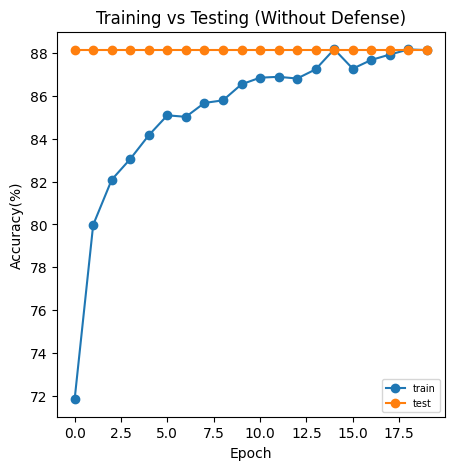

In [8]:
# plot a graph of accuracy training vs testing
plt.figure(figsize=(5, 5))
plt.plot(train_acc, marker='o')
plt.plot(test_acc, marker='o')
plt.title("Training vs Testing (Without Defense)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.legend(['train', 'test'], fontsize=7)
plt.show()


In [9]:
# Run test for each epsilon
adv_acc = []
examples = []
for eps in epsilons:
    acc, ex = model.test_adv(model, device, test_loader, eps, alpha, steps)
    adv_acc.append(acc)
    examples.append(ex)


Start Adversarial Examples Testing ...
Epsilon: 0	Accuracy: 8815/10000 (88%)
Finished Adversarial Examples Testing

Start Adversarial Examples Testing ...
Epsilon: 0.1	Accuracy: 1631/10000 (16%)
Finished Adversarial Examples Testing

Start Adversarial Examples Testing ...
Epsilon: 0.15	Accuracy: 1024/10000 (10%)
Finished Adversarial Examples Testing

Start Adversarial Examples Testing ...
Epsilon: 0.2	Accuracy: 852/10000 (9%)
Finished Adversarial Examples Testing



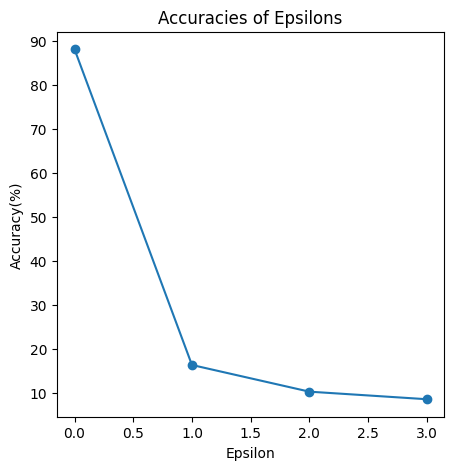

In [10]:
# plot a graph of accuracies vs epsilons
plt.figure(figsize=(5, 5))
plt.plot(adv_acc, marker='o')
plt.title("Accuracies of Epsilons")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy(%)")
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.06it/s]


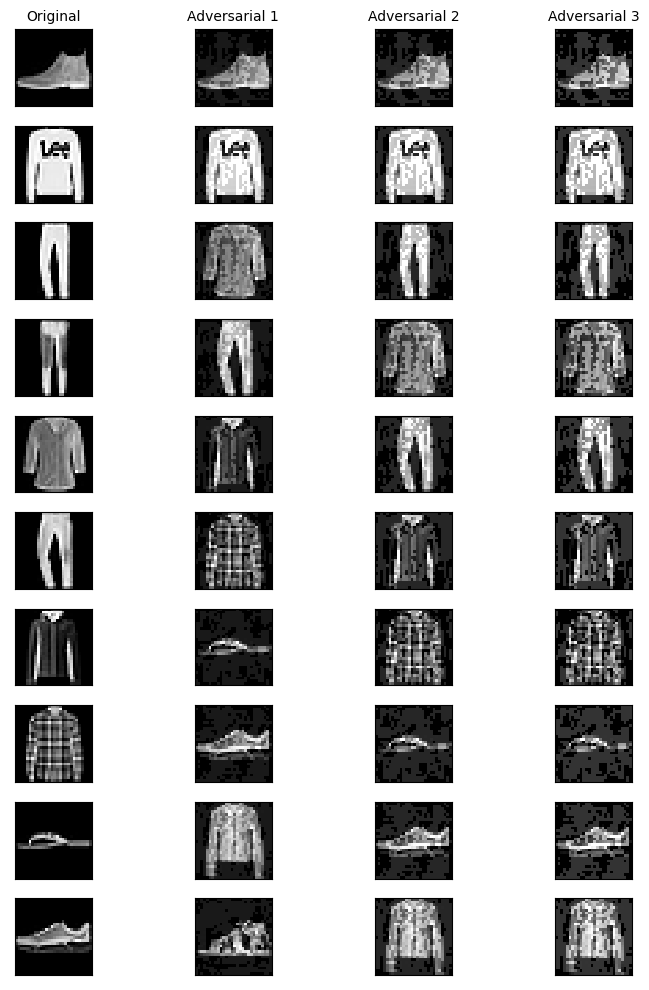

In [11]:
# Plot several examples of original(epsilon=0) and adversarial(epsilon=0.1, 0.15, 0.2) samples
origin_images = []
cnt = 0
plt.figure(figsize=(8, 10))

for i in tqdm(range(len(examples[0]))):
    for j in range(len(epsilons)):
        cnt+=1
        plt.subplot(len(examples[j]), len(epsilons), cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if i == 0 and j == 0:
            plt.title("Original", fontsize=10)
        if i == 0 and j > 0:
            plt.title("Adversarial {}".format(j), fontsize=10)
        ex, origin, adv = examples[j][i]
        if j == 0:
            origin_images.append(ex)
        plt.imshow(ex, cmap="gray", interpolation='nearest')
plt.tight_layout()
plt.show()

In [12]:
# Initialize the network
adv_model = DNN(input_size, hidden_size, output_size)
adv_model = adv_model.to(device)

#Run adversarial train for each epsilon
adv_epsilon = 0.3
adv_train_acc = model.adv_train(adv_model, device, train_loader, adv_epsilon, alpha, steps, learning_rate, num_epochs)


Start Adversarial Training ...
Train Epoch 1:: Accuracy: 2897/10000 (29%)
Train Epoch 2:: Accuracy: 4104/10000 (41%)
Train Epoch 3:: Accuracy: 5014/10000 (50%)
Train Epoch 4:: Accuracy: 5589/10000 (56%)
Train Epoch 5:: Accuracy: 5613/10000 (56%)
Train Epoch 6:: Accuracy: 5188/10000 (52%)
Train Epoch 7:: Accuracy: 5779/10000 (58%)
Train Epoch 8:: Accuracy: 5815/10000 (58%)
Train Epoch 9:: Accuracy: 5766/10000 (58%)
Train Epoch 10:: Accuracy: 5955/10000 (60%)
Train Epoch 11:: Accuracy: 6010/10000 (60%)
Train Epoch 12:: Accuracy: 6090/10000 (61%)
Train Epoch 13:: Accuracy: 6314/10000 (63%)
Train Epoch 14:: Accuracy: 6303/10000 (63%)
Train Epoch 15:: Accuracy: 6062/10000 (61%)
Train Epoch 16:: Accuracy: 6440/10000 (64%)
Train Epoch 17:: Accuracy: 6365/10000 (64%)
Train Epoch 18:: Accuracy: 6321/10000 (63%)
Train Epoch 19:: Accuracy: 6487/10000 (65%)
Train Epoch 20:: Accuracy: 6489/10000 (65%)
Finished Adversarial Training

Saving the model
Saved the model


In [13]:
# Load the adversarial trained model
adv_model.load_state_dict(torch.load("../Homework3/advTrained_model.pth", map_location='cpu'))

# Test the adversarial trained model
adv_test_acc = model.test(adv_model, device, test_loader, num_epochs)

Start Testing ...
Test Epoch 1:: Accuracy: 5480/10000 (55%)
Test Epoch 2:: Accuracy: 5480/10000 (55%)
Test Epoch 3:: Accuracy: 5480/10000 (55%)
Test Epoch 4:: Accuracy: 5480/10000 (55%)
Test Epoch 5:: Accuracy: 5480/10000 (55%)
Test Epoch 6:: Accuracy: 5480/10000 (55%)
Test Epoch 7:: Accuracy: 5480/10000 (55%)
Test Epoch 8:: Accuracy: 5480/10000 (55%)
Test Epoch 9:: Accuracy: 5480/10000 (55%)
Test Epoch 10:: Accuracy: 5480/10000 (55%)
Test Epoch 11:: Accuracy: 5480/10000 (55%)
Test Epoch 12:: Accuracy: 5480/10000 (55%)
Test Epoch 13:: Accuracy: 5480/10000 (55%)
Test Epoch 14:: Accuracy: 5480/10000 (55%)
Test Epoch 15:: Accuracy: 5480/10000 (55%)
Test Epoch 16:: Accuracy: 5480/10000 (55%)
Test Epoch 17:: Accuracy: 5480/10000 (55%)
Test Epoch 18:: Accuracy: 5480/10000 (55%)
Test Epoch 19:: Accuracy: 5480/10000 (55%)
Test Epoch 20:: Accuracy: 5480/10000 (55%)
Finished Testing


In [14]:
# Calculate the average adversarial train and test accuracy over 20 epochs
avg_adv_train_accuracy = np.sum(adv_train_acc) / len(adv_train_acc)
print("Average accuracy of Adversarial Training:", avg_adv_train_accuracy, "%")

avg_adv_test_accuracy = np.sum(adv_test_acc) / len(adv_test_acc)
print("Average accuracy of Adversarial Testing:", avg_adv_test_accuracy, "%")

Average accuracy of Adversarial Training: 57.3005 %
Average accuracy of Adversarial Testing: 54.79999999999999 %


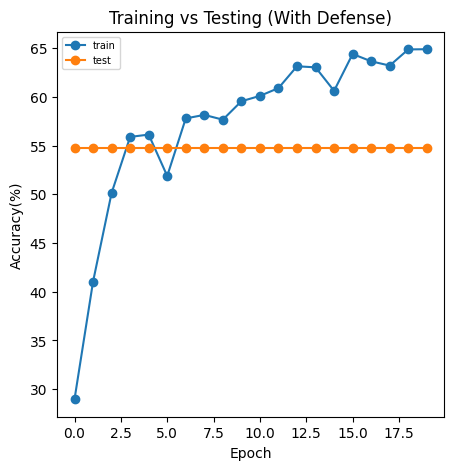

In [15]:
# plot a graph of accuracy adversarial training vs testing
plt.figure(figsize=(5, 5))
plt.plot(adv_train_acc, marker='o')
plt.plot(adv_test_acc, marker='o')
plt.title("Training vs Testing (With Defense)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.legend(['train', 'test'], fontsize=7)
plt.show()
